In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
df  = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

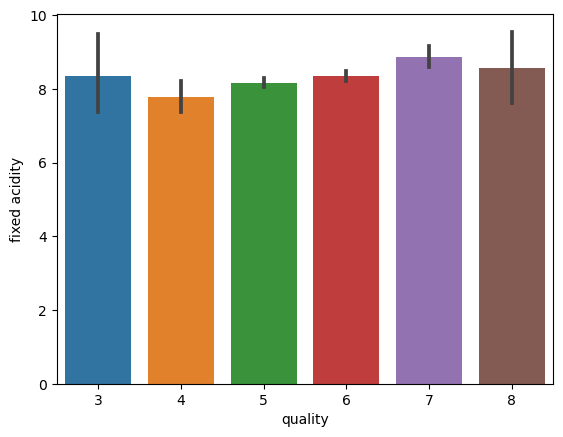

In [7]:
sns.barplot(x = 'quality',y = 'fixed acidity',data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

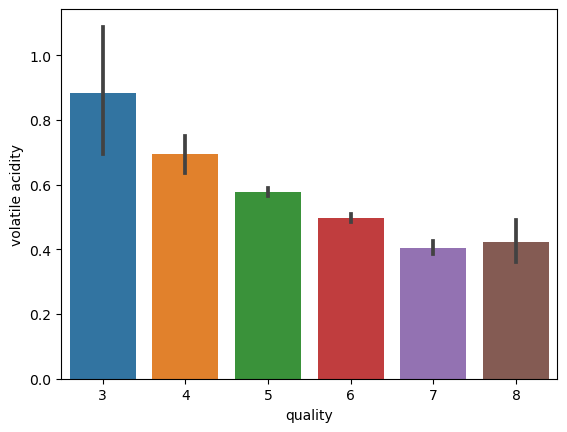

In [8]:
sns.barplot(x = 'quality',y = 'volatile acidity',data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

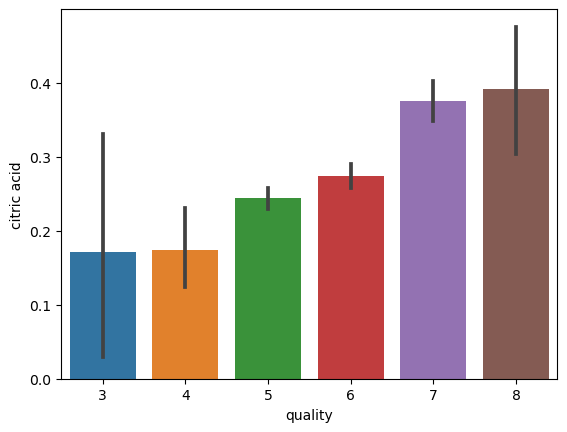

In [9]:
sns.barplot(x = 'quality',y = 'citric acid',data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

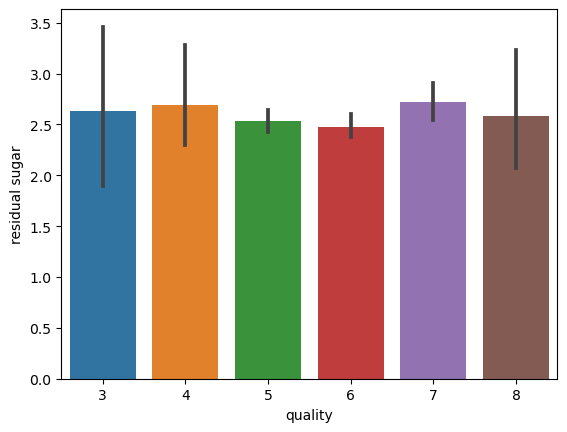

In [10]:
sns.barplot(x = 'quality',y = 'residual sugar',data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

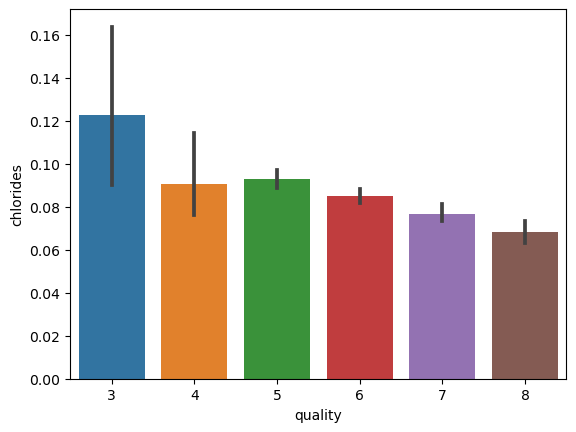

In [11]:
sns.barplot(x = 'quality',y = 'chlorides',data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

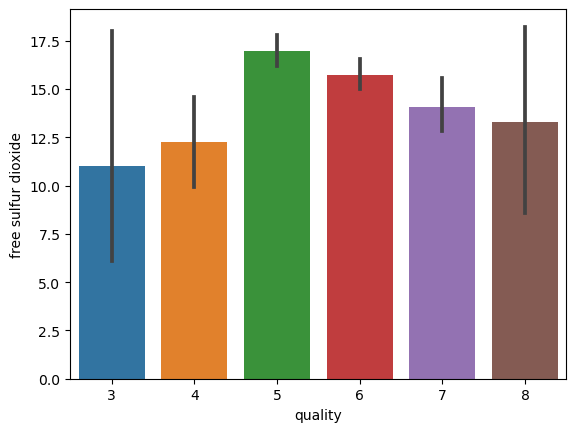

In [12]:
sns.barplot(x = 'quality',y = 'free sulfur dioxide',data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

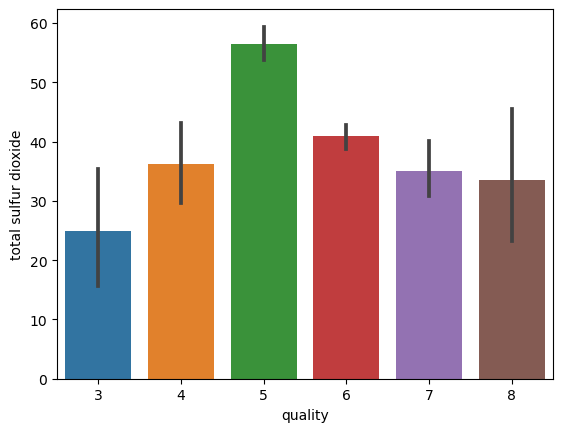

In [13]:
sns.barplot(x = 'quality',y = 'total sulfur dioxide',data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

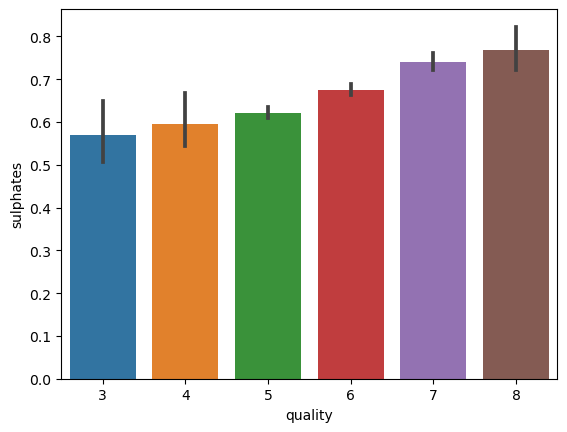

In [14]:
sns.barplot(x = 'quality',y = 'sulphates',data = df)

# Preprocessing the data

In [15]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [16]:
label_quality = LabelEncoder()#to convert categorical variables into numerical format.

In [17]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [18]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: ylabel='count'>

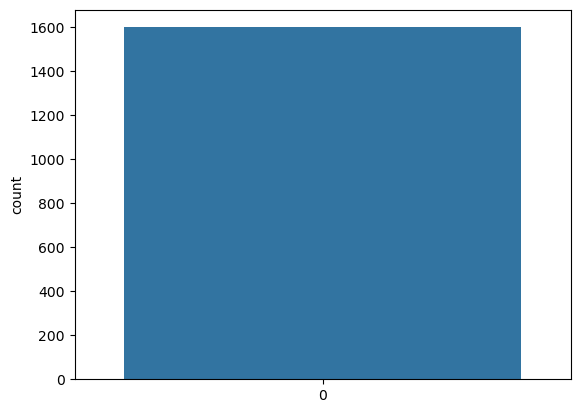

In [19]:
sns.countplot(df['quality'])

# spliting the dataset

In [20]:
x = df.drop('quality',axis = 1)
y = df['quality']

In [21]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)


# Scaling the data

Applying Standard scaling to get optimized result

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Support Vector Classifier

In [25]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)


In [26]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       413
           1       0.66      0.31      0.42        67

    accuracy                           0.88       480
   macro avg       0.78      0.64      0.68       480
weighted avg       0.86      0.88      0.86       480



Support vector classifier gets 88%

# Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [28]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.63      0.48      0.54        67

    accuracy                           0.89       480
   macro avg       0.77      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480



Random forest gives the accuracy of 89%

# K Fold Validation - SVM

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [ ]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),x, y, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

# GridSearchCV - SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(svm.SVC(gamma = 'auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv = 5,return_train_score = False)

clf.fit(x,y)
clf.cv_results_

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

In [ ]:
#important columns from the above df

df[['param_C','param_kernel','mean_test_score']]

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(x, y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

# Models - SVM, RFC, Logit

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma = 'auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
    
}

In [ ]:
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df